In [203]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [204]:
def post_request(endpoint, json):
    result_post = []
    for post in tqdm(range(1)):
        post = requests.post(endpoint, verify=False, json=json).json()
        result_post.append(post)
    return result_post

In [205]:
endpoint = 'http://localhost:5000/api/database/find_query'

json_find_query = {
    'query': "#corinthians"
}

In [206]:
%%time
send_post = post_request(endpoint, json_find_query)
send_post

100%|██████████| 1/1 [00:00<00:00, 81.66it/s]

CPU times: user 7.68 ms, sys: 0 ns, total: 7.68 ms
Wall time: 13.9 ms


[{'resultado': [{'_id': '60ab9413fccbc9e4ed1c1b8e',
    'date': '2021-05-24',
    'text': 'Fagner já está de volta ao CT Dr. Joaquim Grava! Após ser contaminado, novamente, pelo vírus da Covid-19, o lateral retorna aos treinamentos depois de 10 dias longe do clube.  #Corinthians #VaiCorinthians  https://t.co/rXlPSAQ19P',
    'predict': 0,
    'query': '#corinthians'},
   {'_id': '60ab9413fccbc9e4ed1c1b8f',
    'date': '2021-05-24',
    'text': '@PictureSporting @MikeJ_A #Corinthians',
    'predict': 1,
    'query': '#corinthians'},
   {'_id': '60ab9413fccbc9e4ed1c1b90',
    'date': '2021-05-24',
    'text': '16. Este é o número cabalístico do #Corinthians no #brasileirao2021  A posição para o Timão ficar no próximo campeonato é a 16ª colocação.. #timao  #timãomilgrau  #MeuTimao',
    'predict': 0,
    'query': '#corinthians'},
   {'_id': '60ab9413fccbc9e4ed1c1b91',
    'date': '2021-05-24',
    'text': '#ブラジルリーグ の人気クラブ #コリンチャンス のトレーニングアイテムにポロシャツが新入荷！  #corinthians #ガヴィオンス #ブラジル代表 #サッカー

In [207]:
send_post[0]['resultado'][0]

{'_id': '60ab9413fccbc9e4ed1c1b8e',
 'date': '2021-05-24',
 'text': 'Fagner já está de volta ao CT Dr. Joaquim Grava! Após ser contaminado, novamente, pelo vírus da Covid-19, o lateral retorna aos treinamentos depois de 10 dias longe do clube.  #Corinthians #VaiCorinthians  https://t.co/rXlPSAQ19P',
 'predict': 0,
 'query': '#corinthians'}

In [208]:
df = pd.DataFrame.from_dict(send_post[0]['resultado'])

In [209]:
df.head()

,_id,date,text,predict,query
0,60ab9413fccbc9e4ed1c1b8e,2021-05-24,Fagner já está de volta ao CT Dr. Joaquim Grav...,0,#corinthians
1,60ab9413fccbc9e4ed1c1b8f,2021-05-24,@PictureSporting @MikeJ_A #Corinthians,1,#corinthians
2,60ab9413fccbc9e4ed1c1b90,2021-05-24,16. Este é o número cabalístico do #Corinthian...,0,#corinthians
3,60ab9413fccbc9e4ed1c1b91,2021-05-24,#ブラジルリーグ の人気クラブ #コリンチャンス のトレーニングアイテムにポロシャツが新入荷...,1,#corinthians
4,60ab9413fccbc9e4ed1c1b92,2021-05-24,Caiu na rede é peixe! Na noite de ontem as min...,0,#corinthians


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
_id        100 non-null object
date       100 non-null object
text       100 non-null object
predict    100 non-null int64
query      100 non-null object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [211]:
def create_graph(df):
    
    df.drop(['_id', 'text'], axis=1, inplace=True)
    
    # Ordenando o dataframe pela data
    df = df.sort_values(by=['date'], ascending=True)
    
    labels = list(df.date.unique())
    list_positivo = []
    list_negativo = []


    series_count = df.groupby('date').predict.value_counts()
    for i in range(len(series_count)):
        if series_count.index[i][1] == 0:
            list_positivo.append(series_count[i])
        else:
            list_negativo.append(series_count[i])


    x = np.arange(len(labels)) # localização das labels
    width = 0.35  # largura das barras

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, list_positivo, width, label='Postivo', alpha=0.7)
    rects2 = ax.bar(x + width/2, list_negativo, width, label='Negativo', alpha=0.7)

    # Adiciona texto para as labels, título e customizações dos tickets das labels.
    ax.set_ylabel('Quantidade de comentários')
    ax.set_title('Quantidade de comentários por classe, dia e a query: ' + df['query'][0])
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

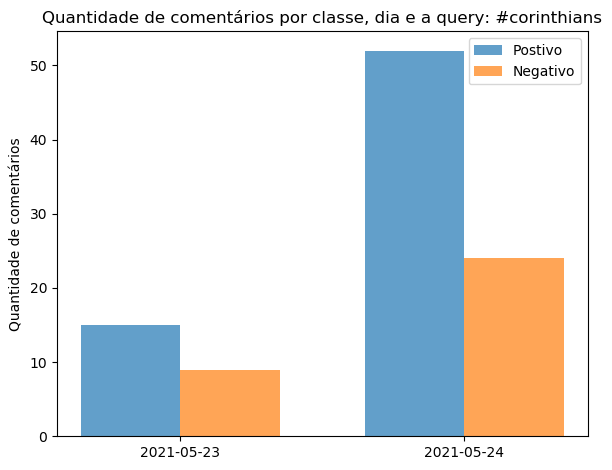

In [212]:
create_graph(df)